# Laboratorium 1
Jan Stobnicki i Wojciech Kłyszejko

Ćwiczenie nr 1. Proszę napisać mnożenie qxq macierzy IGA i IGA używając algorytmu mnożenia
blokowego, i dobrać optymalną kolejność pętli oraz rozmiar bloków

1. Proszę wybrać dwie możliwie duże macierze A i B złożone z qxq bloków ze swoich
dwóch rodzin macierzy, takie żeby zgadzały się ich rozmiary, oraz przemnożyć je
A*B swoim optymalnym algorytmem (tak duże macierze jakie da się w czasie
kilku-kilkudziesięciu minut przemnożyć na Państwa laptopie)
2. Proszę narysować schemat niezerowych wartości swoich dwóch dużych macierzy
(używając komendy spy(A), spy(B) MATLABa) oraz macierzy wynikowej A*B

## 1. i 2.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

def load_matrix(file_path):
    with open(file_path, "r") as file:
        return np.loadtxt(file, delimiter=",")
    
def enlarge_matrix(m, q):
    size = len(m) * q
    res = np.zeros([size, size])
    for i in range(size):
        for j in range(size):
            res[i, j] = m[i % len(m), j % len(m)]
    return res

def draw_nonzero_values(m):
    figure(figsize=(15, 9), dpi=80)
    plt.spy(m)
    plt.show()

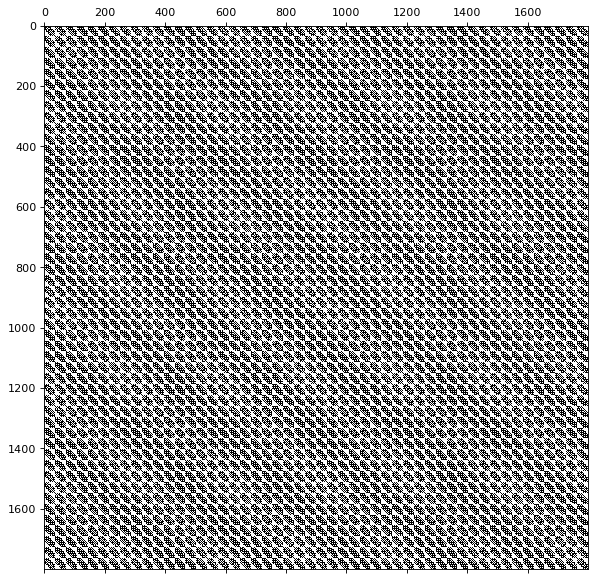

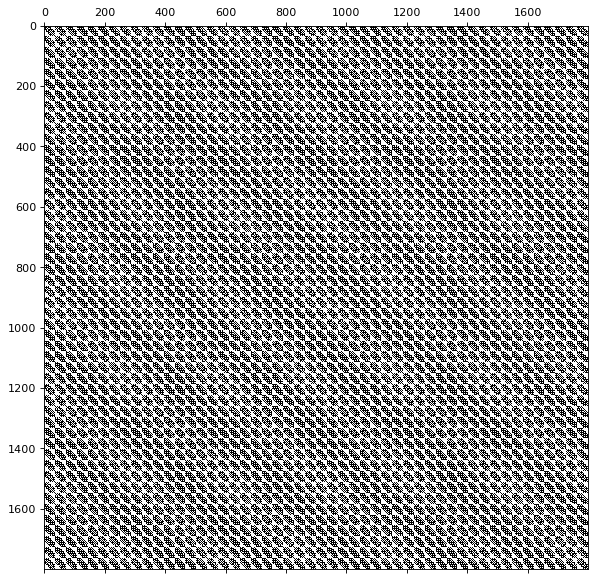

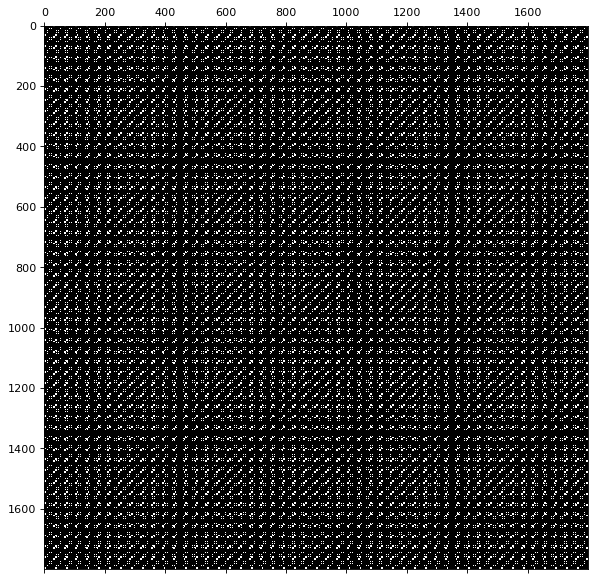

In [2]:
M1 = enlarge_matrix(load_matrix("matrices/iga4_2.csv"), 50)
M2 = enlarge_matrix(load_matrix("matrices/iga4_2.csv"), 50)

M3 = M1@M2

draw_nonzero_values(M1)
draw_nonzero_values(M2)
draw_nonzero_values(M3)

3. Proszę zmierzyć czas mnożenia tych wybranych dwóch dużych macierzy blokowych
dla różnej kolejności pętli w algorytmie mnożenia macierzy. Proszę narysować
tabelkę: kolejność pętli (6 możliwości) versus czasy mnożenia

Ten punkt zostaje przez nas pominięty ze względu na charakterystykę środowiska w jakim wykonujemy obliczenia. 
Python jest wysokopoziomowym językiem interpretowalnym, przez co różna kolejność pętli zostanie zoptymalizowana przez
interpreter i nie będzie zauważalnej różnicy w czasie wykonywania się obliczeń.

4. Proszę wybrać jedną kolejność pętli i następnie dla swoich dwóch dużych macierzy
A i B zmierzyć czasy mnożenia w algorytmie mnożenia blokowego. Proszę
narysować wykres: oś x rozmiar bloków, oś y czas mnożenia

In [3]:
def ijp_multiplication(m1, m2):
    m, n, k = len(m1), len(m2), len(m1[0])
    res = np.zeros([m, n])
    for i in range(m):
        for j in range(n):
            for p in range(k):
                res[i, j] += m1[i, p] * m2[p, j]
    return res

In [4]:
def block_matrix_multiplication(m1, m2, m_block_s, n_block_s, k_block_s):
    m, n, k = len(m1), len(m2), len(m1[0])
    res = np.zeros([m, n])
    for i in range(0, m, m_block_s):
        for j in range(0, n, n_block_s):
            for p in range(0, k, k_block_s):
                A_block = m1[i:i + m_block_s, p:p + k_block_s]
                B_block = m2[p:p + k_block_s, j:j + n_block_s]
                res[i:i + m_block_s, j:j + n_block_s] = ijp_multiplication(A_block, B_block)
    return res

In [25]:
from time import time

def timetest(m1, m2, mul_type, block_size: None):
    start_time = time()
    
    if mul_type == "block":
        block_matrix_multiplication(m1, m2, block_size, block_size, block_size)
    else:
        ijp_multiplication(m1,m2)
    res = time() - start_time
    print(res)
    return res


def get_average_mul_time(m1, m2, mul_type, trial_number, block_size: None):
    total_time = 0
    for i in range(trial_number):
        total_time += timetest(m1, m2, mul_type, block_size)
    res = total_time / trial_number
    print("Avg time for "+ str(mul_type) + " is: " + str(res) + " seconds")
    return res

def plot_timetest_results(block_sizes, time_taken):
    
    x_coords = [i for i in range(len(block_sizes))]
    
    plt.plot(x_coords, time_taken, color='red')

    plt.xlabel("Block size")
    plt.ylabel("Multiplication time in [seconds]")
    plt.xticks(x_coords, block_sizes)

    plt.show()


Postanowilismy przetestowac czas wykonywania obliczen dla roznych wygenerowanych macierzy 

In [27]:
scale_factor = 5

M1_timetest = enlarge_matrix(load_matrix("matrices/iga8_2.csv"), scale_factor)
M2_timetest = enlarge_matrix(load_matrix("matrices/iga8_2.csv"), scale_factor)

In [28]:
M1_timetest.shape

(500, 500)

In [29]:
block_sizes = [2, 4, 5, 10, 25, 50, 100, 125, 250]
trials = 1

In [30]:
mul_type = "block"
block_mul_times = [get_average_mul_time(M1_timetest, M2_timetest, mul_type, trials, bs) for bs in block_sizes]

168.58320450782776
Avg time for block is: 168.58320450782776 seconds
116.73626661300659
Avg time for block is: 116.73626661300659 seconds
109.94623327255249
Avg time for block is: 109.94623327255249 seconds
97.86286926269531
Avg time for block is: 97.86286926269531 seconds
96.46940851211548
Avg time for block is: 96.46940851211548 seconds
94.00462603569031
Avg time for block is: 94.00462603569031 seconds
93.17913365364075
Avg time for block is: 93.17913365364075 seconds
91.65324854850769
Avg time for block is: 91.65324854850769 seconds
91.4531512260437
Avg time for block is: 91.4531512260437 seconds


block_mul_times :
    [168.58320450782776,
 116.73626661300659,
 109.94623327255249,
 97.86286926269531,
 96.46940851211548,
 94.00462603569031,
 93.17913365364075,
 91.65324854850769,
 91.4531512260437]

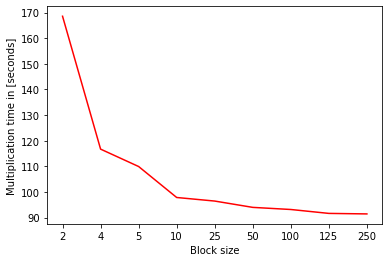

In [31]:
plot_timetest_results(block_sizes, block_mul_times)

5. Proszę obliczyć liczbę operacji zmienno-przecinkowych koniecznych do
przemnożenia swoich dwóch macierzy